# Testing workspace

In [21]:
print("hello world")

hello world


# Crecimiento del PIB per cápita (% anual) - Mexico (some notes)

### [Help] Graficando distribuciones
* Histogramas

https://relopezbriega.github.io/blog/2016/06/29/distribuciones-de-probabilidad-con-python/

### Información de la base de datos
* Data Source: Indicadores del desarrollo mundial
* Last Updated: 16/09/2022

# Project. Begining data processing

## Getting data

* Importing database and modules

In [82]:
"""
Created on Sat 05 11 12:58:00 2022
@author: Jorge Antonio Gómez García

"""


# Modules
import pandas as pd # To work with dataframes
from matplotlib import pyplot as plt # To plot
# From histograms blog
import numpy as np # To work with arrays
from scipy import stats # To work with statistics
import seaborn as sns # To plot


np.random.seed(2022) # replicar random
# Parámetros estéticos de seaborn
sns.set_palette( 'deep' , desat=0.6 )
sns.set_context( rc={ "figure.figsize": (8, 4) } )


# Import data
database = pd.read_csv( 'database.csv' , header=0 )
# metadata_country = pd.read_csv( 'metadata_country.csv' , header=4 , delim_whitespace=True )

* (Optional). Validating database existence

In [23]:
print( database )

        Country Name Country Code                            Indicator Name  \
0              Aruba          ABW  Crecimiento del PIB per cápita (% anual)   
1                AFE          AFE  Crecimiento del PIB per cápita (% anual)   
2         Afganistán          AFG  Crecimiento del PIB per cápita (% anual)   
3                AFW          AFW  Crecimiento del PIB per cápita (% anual)   
4             Angola          AGO  Crecimiento del PIB per cápita (% anual)   
..               ...          ...                                       ...   
261           Kosovo          XKX  Crecimiento del PIB per cápita (% anual)   
262  Yemen, Rep. del          YEM  Crecimiento del PIB per cápita (% anual)   
263        Sudáfrica          ZAF  Crecimiento del PIB per cápita (% anual)   
264           Zambia          ZMB  Crecimiento del PIB per cápita (% anual)   
265         Zimbabwe          ZWE  Crecimiento del PIB per cápita (% anual)   

        Indicator Code      1961      1962      196

* Finding a country in the database

In [24]:
# Search a row in the database
country_name = 'México'
find_row = database.loc[ database[ 'Country Name' ] == country_name ]

country_index = find_row.index.values[0]

print( 'Índice en la tabla: [', country_index , ']' )
print( '******************** Datos encontrados *******************' )
print( find_row.iloc[ 0 ] )

Índice en la tabla: [ 154 ]
******************** Datos encontrados *******************
Country Name                                        México
Country Code                                           MEX
Indicator Name    Crecimiento del PIB per cápita (% anual)
Indicator Code                           NY.GDP.PCAP.KD.ZG
1961                                              1.782077
                                    ...                   
2017                                              0.931457
2018                                              1.050314
2019                                             -1.269322
2020                                             -9.134044
2021                                              3.727623
Name: 154, Length: 65, dtype: object


* Creating a data variable

In [25]:
# Get the data from the row of any country
data_country = database.iloc[ country_index ]

# Get the data of the country above the 4th column (from the first year registered [1961]). 
data_country_values = data_country[ 4: ]

# If you want to see the data of another country, you can change the index in the next line
# data_country = database.iloc[ 154 ]

* (Optional) Print values

In [26]:
print( data_country_values )

1961    1.782077
1962    1.463526
1963    4.803232
1964    8.481411
1965    3.816439
          ...   
2017    0.931457
2018    1.050314
2019   -1.269322
2020   -9.134044
2021    3.727623
Name: 154, Length: 61, dtype: object


## Processing data

Check at the important variables:
* _data_country_
* _data_country_values_
* _database.iloc[ i ]_ 

* Printing a graph with _pyplot_ as _plt_

In [27]:
# function to pretty graph
def pretty_graph( title , xdata , ydata , xlabel , ylabel ):
    plt.title( title )

    plt.bar( data_country_values.index , data_country_values.values ) # Datos en los ejes
    plt.bar( xdata , ydata ) # Datos en los ejes
    # plt.title( data_country[ 2 ] + ' de ' + country_name ) # Esto rescata el nombre del indicador de la tercera columna

    plt.xticks( rotation=90 ) # Rotación de los datos en el eje x
    plt.subplots_adjust( bottom=0.3 ) # Altura de la gráfica
    plt.subplots_adjust( left=-0.8 ) # Ancho de la gráfica

    plt.grid( axis='y' , linestyle='--' ) # Grid en el eje y

    plt.xlabel( xlabel ) # Título del eje x
    plt.ylabel( ylabel ) # Título del eje y

    plt.show()

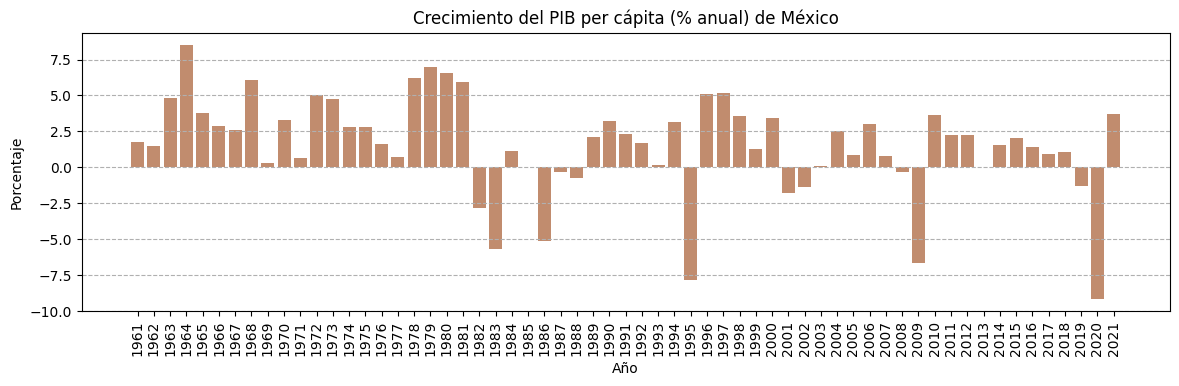

In [28]:
# Plot the data of the country linegraph

pretty_graph( data_country[ 2 ] + ' de ' + country_name , data_country_values.index , data_country_values.values , 'Año' , 'Porcentaje' )

* Calculating interesting statistical stuff

In [29]:
# Calculating the average
average = data_country_values.mean()
print( '\033[1m' + 'Promedio: ' + '\033[0m' + str( average ) )
# ¿Qué es el promedio? Es la suma de todos los datos dividido entre la cantidad de datos.
# Un ejemplo es el siguiente:
# 1 + 2 + 3 + 4 + 5 = 15
# 15 / 5 = 3
# El promedio es 3

# # Calculating the standard deviation
standard_deviation = data_country_values.std()
print( '\033[1m' + 'Desviación estándar: ' + '\033[0m' + str( standard_deviation ) )
# ¿Qué es la desviación estándar? Es la raíz cuadrada de la suma de los cuadrados de la diferencia entre cada dato y el promedio, dividido entre la cantidad de datos.
# Básicamente es la distancia promedio de cada dato al promedio.
# Un ejemplo es el siguiente:
# 1 - 3 = -2
# 2 - 3 = -1
# 3 - 3 = 0
# 4 - 3 = 1
# 5 - 3 = 2
# -2^2 + -1^2 + 0^2 + 1^2 + 2^2 = 10
# 10 / 5 = 2
# 2^1/2 = 1.4142135623730951
# La desviación estándar es 1.4142135623730951

# Calculating the variance
variance = data_country_values.var()
print( '\033[1m' + 'Varianza: ' + '\033[0m' + str( variance ) )
# ¿Qué es la varianza? Es la suma de los cuadrados de la diferencia entre cada dato y el promedio, dividido entre la cantidad de datos.
# Básicamente es la distancia al cuadrado promedio de cada dato al promedio.
# Un ejemplo es el siguiente:
# 1 - 3 = -2
# 2 - 3 = -1
# 3 - 3 = 0
# 4 - 3 = 1
# 5 - 3 = 2
# -2^2 + -1^2 + 0^2 + 1^2 + 2^2 = 10
# 10 / 5 = 2
# La varianza es 2

# Calculating the median
median = data_country_values.median()
print( '\033[1m' + 'Mediana: ' + '\033[0m' + str( median ) )
# ¿Qué es la mediana? Es el dato que se encuentra en la mitad de los datos ordenados de menor a mayor.
# Un ejemplo es el siguiente:
# 1, 2, 3, 4, 5
# El dato que se encuentra en la mitad es el 3
# La mediana es 3

# Calculating the mode
mode = data_country_values.mode()
print( '\033[1m' + 'Moda: \n' + '\033[0m' + str( mode ) )
# ¿Qué es la moda? Es el dato que más se repite.
# Un ejemplo es el siguiente:
# 1, 2, 3, 4, 5, 5
# El dato que más se repite es el 5
# La moda es 5

# Calculating the maximum value
maximum = data_country_values.max()
print( '\033[1m' + 'Máximo: ' + '\033[0m' + str( maximum ) )
# ¿Qué es el máximo? Es el dato más grande.
# Un ejemplo es el siguiente:
# 1, 2, 3, 4, 5
# El dato más grande es el 5
# El máximo es 5

# Calculating the minimum value
minimum = data_country_values.min()
print( '\033[1m' + 'Mínimo: ' + '\033[0m' + str( minimum ) )
# ¿Qué es el mínimo? Es el dato más pequeño.
# Un ejemplo es el siguiente:
# 1, 2, 3, 4, 5
# El dato más pequeño es el 1
# El mínimo es 1

# Calculating the range
range = maximum - minimum
print( '\033[1m' + 'Rango: ' + '\033[0m' + str( range ) )
# ¿Qué es el rango? Es la diferencia entre el máximo y el mínimo.
# Un ejemplo es el siguiente:
# 1, 2, 3, 4, 5
# El máximo es el 5 y el mínimo es el 1
# 5 - 1 = 4
# El rango es 4

# Calculating the coefficient of variation
coefficient_of_variation = standard_deviation / average
print( '\033[1m' + 'Coeficiente de variación: ' + '\033[0m' + str( coefficient_of_variation ) )
# ¿Qué es el coeficiente de variación? Es la desviación estándar dividida entre el promedio.
# Básicamente es la distancia promedio de cada dato al promedio.
# Un ejemplo es el siguiente:
# 1 - 3 = -2
# 2 - 3 = -1
# 3 - 3 = 0
# 4 - 3 = 1
# 5 - 3 = 2
# -2^2 + -1^2 + 0^2 + 1^2 + 2^2 = 10
# 10 / 5 = 2
# 2^1/2 = 1.4142135623730951
# 1.4142135623730951 / 3 = 0.4714045207910317
# El coeficiente de variación es 0.4714045207910317 

# Calculating the skewness
skewness = ( 3 * ( average - median ) ) / standard_deviation
print( '\033[1m' + 'Asimetría: ' + '\033[0m' + str( skewness ) )
# ¿Qué es la asimetría? Es la distancia promedio de cada dato al promedio, dividido entre la desviación estándar.
# En términos sencillos, es la medida que indica la simetría de la distribución de una variable respecto a la media aritmética, sin necesidad de hacer la representación gráfica. Los coeficientes de asimetría indican si hay el mismo número de elementos a izquierda y derecha de la media.
# Un ejemplo es el siguiente:
# 1 - 3 = -2
# 2 - 3 = -1
# 3 - 3 = 0
# 4 - 3 = 1
# 5 - 3 = 2
# -2^2 + -1^2 + 0^2 + 1^2 + 2^2 = 10
# 10 / 5 = 2
# 2^1/2 = 1.4142135623730951
# 3 * ( 3 - 3 ) / 1.4142135623730951 = 0
# La asimetría es 0

# Calculating the kurtosis
kurtosis = ( 3 * ( average - median ) ) / standard_deviation
print( '\033[1m' + 'Curtosis: ' + '\033[0m' + str( kurtosis ) )
# ¿Qué es la curtosis? Es la distancia promedio de cada dato al promedio, pero en porcentaje.
# En términos sencillos es la medida que indica la concentración de los datos en torno a la media aritmética, sin necesidad de hacer la representación gráfica. Los coeficientes de curtosis indican si hay una mayor concentración de datos en torno a la media.
# Un ejemplo es el siguiente:
# 1 - 3 = -2
# 2 - 3 = -1
# 3 - 3 = 0
# 4 - 3 = 1
# 5 - 3 = 2
# -2^2 + -1^2 + 0^2 + 1^2 + 2^2 = 10
# 10 / 5 = 2
# 2^1/2 = 1.4142135623730951
# 1.4142135623730951 / 3 = 0.4714045207910317
# 0.4714045207910317 * 100 = 47.14045207910317
# La curtosis es 47.14045207910317

# Calculating the quartiles
quartiles = data_country_values.quantile( [ 0.25 , 0.5 , 0.75 ] )
print( '\033[1m' + 'Cuartiles: \n' + '\033[0m' + str( quartiles ) )
# ¿Qué son los cuartiles? Son los datos que dividen a los datos en 4 partes iguales.
# En términos sencillos, los cuartiles son los valores que dividen a un conjunto de datos ordenados en cuatro partes iguales.
# Un ejemplo es el siguiente: 
# Sean los datos 1, 2, 3, 4, 5, 6, 7, 8, 9, 10
# Los cuartiles son los siguientes: 3, 5.5, 8
# El primer cuartil es 3
# El segundo cuartil es 5.5
# El tercer cuartil es 8

# Calculating the interquartile range
interquartile_range = quartiles[ 0.75 ] - quartiles[ 0.25 ]
print( '\033[1m' + 'Rango intercuartílico: ' + '\033[0m' + str( interquartile_range ) )
# ¿Qué es el rango intercuartílico? Es la diferencia entre el tercer cuartil y el primer cuartil.
# Un ejemplo es el siguiente:
# Sean los datos 1, 2, 3, 4, 5, 6, 7, 8, 9, 10
# Los cuartiles son los siguientes: 3, 5.5, 8
# El primer cuartil es 3
# El segundo cuartil es 5.5
# El tercer cuartil es 8
# 8 - 3 = 5
# El rango intercuartílico es 5

Promedio: 1.5538367630819674
Desviación estándar: 3.4257140387033114
Varianza: 11.735516674968952
Mediana: 1.782077137
Moda: 
0    -9.134044
1    -7.831751
2    -6.674165
3    -5.677485
4    -5.096859
        ...   
56    6.089059
57    6.211746
58    6.593621
59    6.995634
60    8.481411
Name: 154, Length: 61, dtype: object
Máximo: 8.481411031
Mínimo: -9.134043843
Rango: 17.615454874
Coeficiente de variación: 2.2046807747736366
Asimetría: -0.19987690566643904
Curtosis: -0.19987690566643904
Cuartiles: 
0.25    0.157923
0.50    1.782077
0.75    3.440976
Name: 154, dtype: object
Rango intercuartílico: 3.28305317


* Graphs of statistical stuff

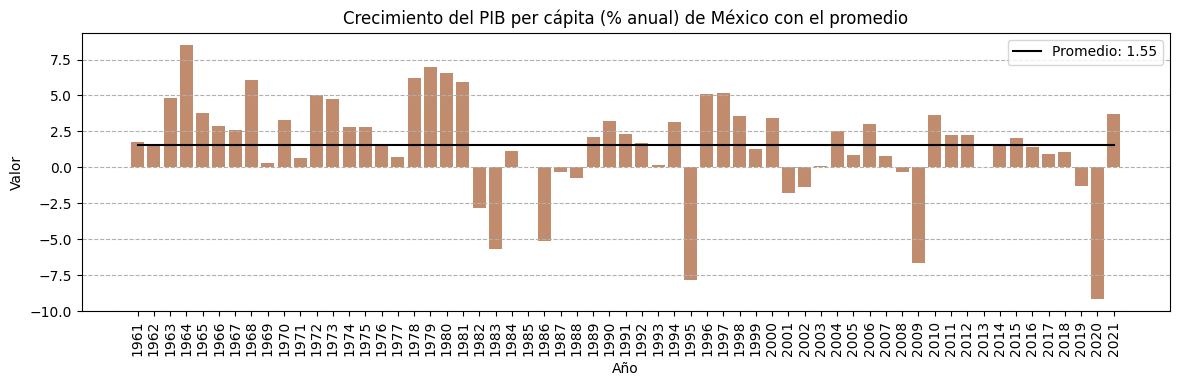

In [30]:
# A graph of the average of the data per year

plt.plot( data_country_values.index , [ average ] * len( data_country_values.index ) , color = 'black' , label = 'Promedio: ' + str( round( average , 2 ) ) )
plt.legend( loc = 'upper right' )

pretty_graph( data_country[ 2 ] + ' de ' + country_name + ' con el promedio' , data_country_values.index , data_country_values.values , 'Año' , 'Valor' )

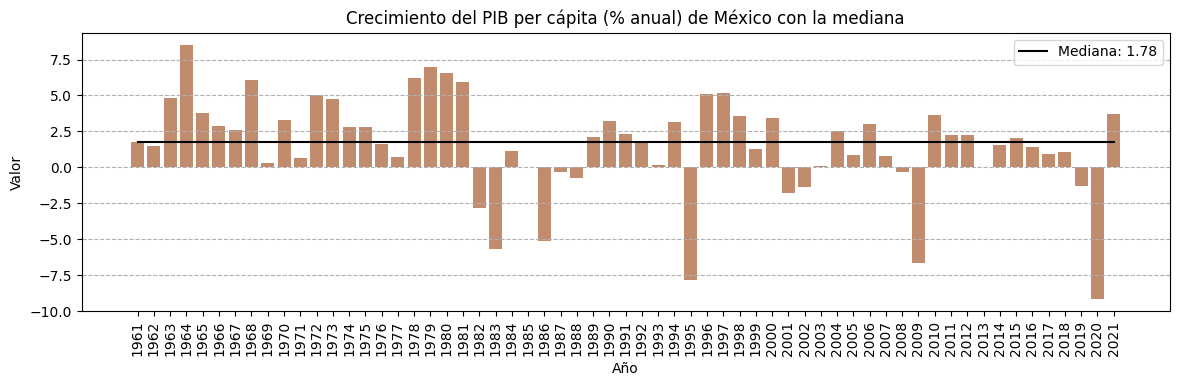

In [31]:
# A graph of the median of the data per year

plt.plot( data_country_values.index , [ median ] * len( data_country_values.index ) , color = 'black' , label = 'Mediana: ' + str( round( median , 2 ) ) )
plt.legend( loc = 'upper right' )

pretty_graph( data_country[ 2 ] + ' de ' + country_name + ' con la mediana' , data_country_values.index , data_country_values.values , 'Año' , 'Valor' )


## Sobre el trabajo de Estadística
---

***Objetivos del trabajo:***  
* Familiarizarse con _Python_, _R_ o _MatLab_ para el procesamiento de datos.


---
### Lineamientos

***a) Comandos para calcular probabilidades de las _distribuciones más comunes_ (+ 1 ejemplo de cada uno).***
* No incluyas la distribución **Uniforme** ni la  **Bernoulli**. Únicamente las otras 7:
  * Distribuciones discretas:
    1. Distribución binomial
    2. Distribución geométrica
    3. Distribución _Poisson_
  * Distribuciones continuas:
    1. Distribución exponencial
    2. Distribución normal
    3. Distribución _Gamma_ y sus casos particulares
    4. Distribución _Beta_

    
***b) Hacer un análisis descriptivo.***
 * Usar un conjunto de datos $\{x_1, x_2, ..., x_n\}$ tal que $30 \leq n \leq 100$.
 * Calcular la **media**: $\={x} = \dfrac{x_1 + ... + x_n}{n}$.
 * Calcular la **desviación estándar** de $n$.
 * Crear un **histograma** (frecuencia relativa) en 10 intervalos.


***c) Formato de entrega***
* Título
*  Autor
*  Resumen
1. Introducción
2. Cálculo de probabilidades
3. Análisis descriptivo de los datos
4. (Opcional) Conclusiones o comentarios finales
5. Referencias

---